<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/ETS_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error , r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/sp500sub.csv' , index_col='Date' , parse_dates=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [33]:
goog=df[df['Name']=='GOOG'][['Close']].copy()
goog

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956
...,...
2018-12-21,979.539978
2018-12-24,976.219971
2018-12-26,1039.459961


<Axes: xlabel='Date'>

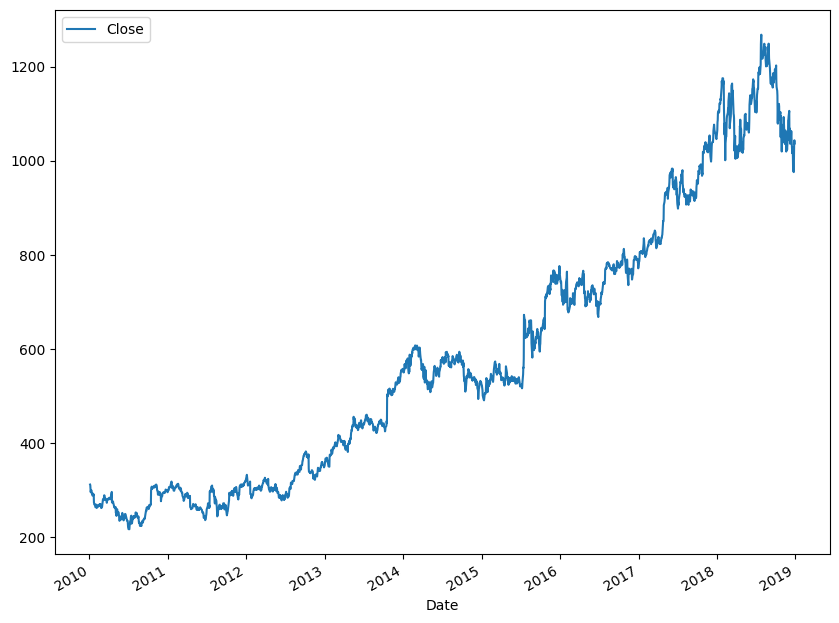

In [34]:
goog.plot(figsize=(10,8))

In [35]:
goog['LogClose']=np.log(goog['Close'])

<Axes: xlabel='Date'>

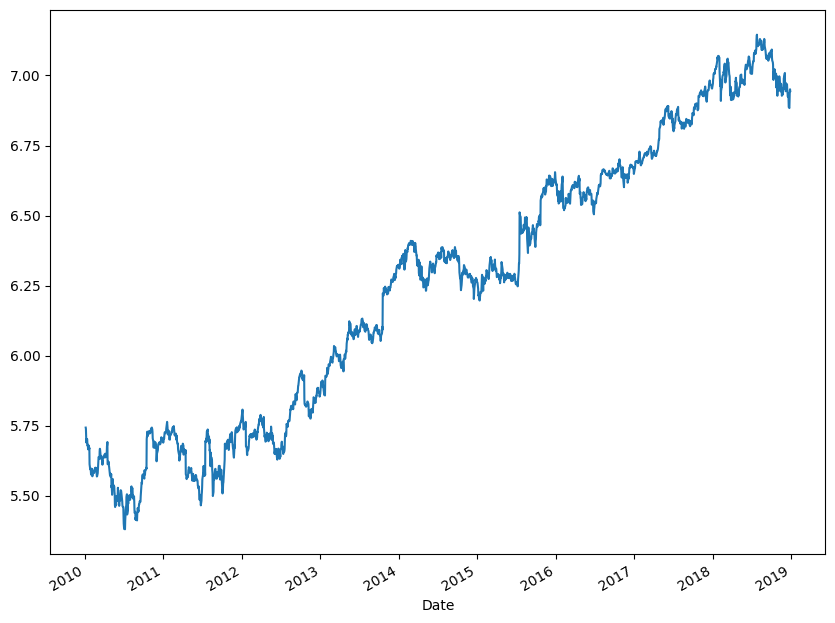

In [36]:
goog['LogClose'].plot(figsize=(10,8))

In [37]:
Ntest=30
train=goog.iloc[:-Ntest]
test=goog.iloc[-Ntest:]

In [38]:
#bollean series
train_idx=goog.index<=train.index[-1]
train.index.freq = goog.index.freq

test_idx=goog.index > train.index[-1]
test.index.freq = goog.index.freq


In [39]:
np.count_nonzero(goog.index > train.index[-1])


30

In [40]:
hw=ExponentialSmoothing(
    train['LogClose'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal=None

)
res_hw=hw.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
print(len(test_idx))

2263


In [42]:
goog.loc[train_idx, 'HoltWintersTrain']= res_hw.fittedvalues
goog.loc[test_idx, 'HoltWintersTest']= res_hw.forecast(Ntest).values

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

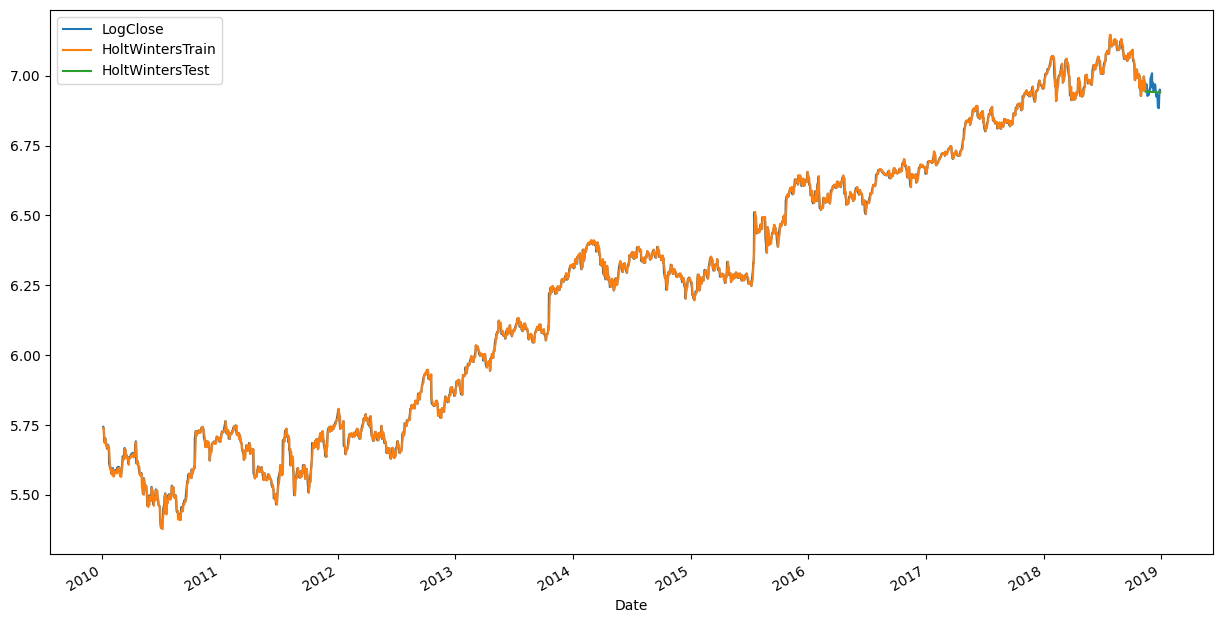

In [44]:
goog[['LogClose', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15,8))

<Axes: xlabel='Date'>

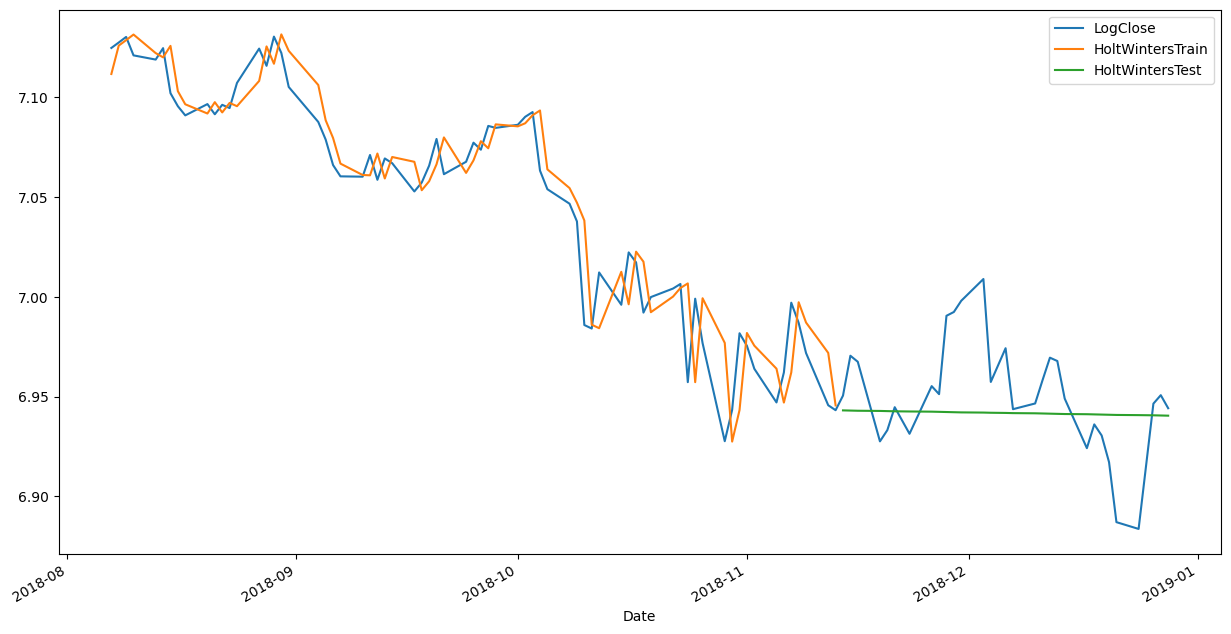

In [48]:
goog.iloc[-100:][['LogClose', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15,8))

<Axes: xlabel='Date'>

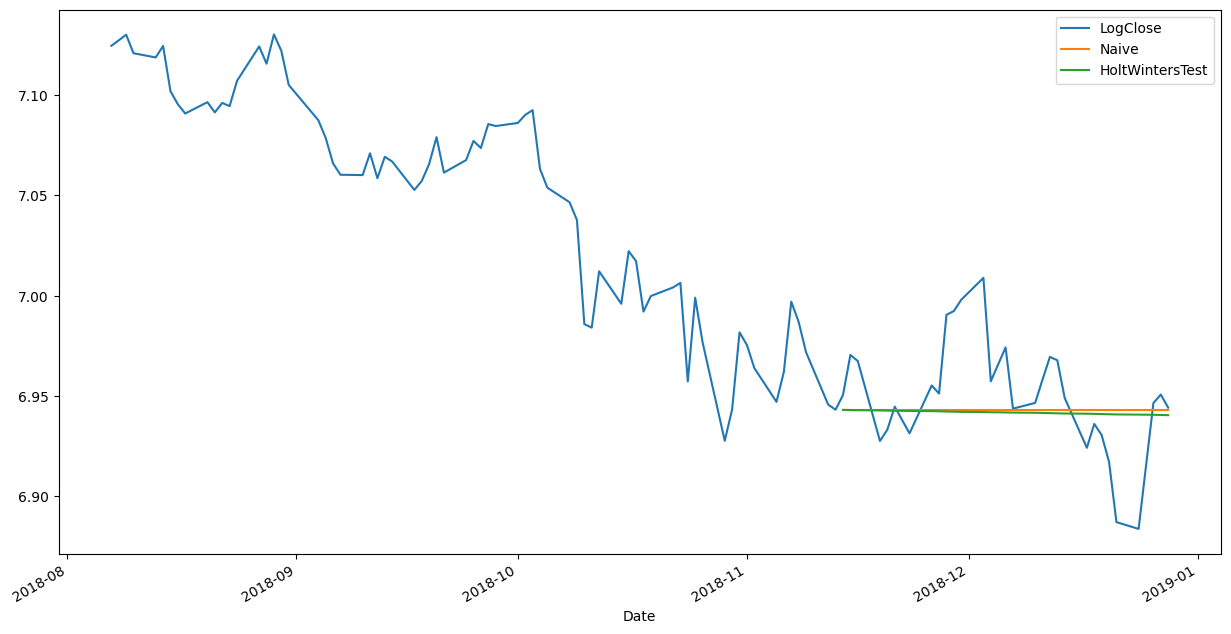

In [50]:
goog.loc[test_idx, 'Naive']=train.iloc[-1]['LogClose']
goog.iloc[-100:][['LogClose', 'Naive', 'HoltWintersTest']].plot(figsize=(15,8))

In [51]:
r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'Naive'])

-0.06454209862026317

In [52]:
r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'HoltWintersTest'])

-0.07182717302032238